In [97]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

import math, copy

from sklearn.preprocessing import LabelEncoder, RobustScaler, StandardScaler

In [98]:
breast = pd.read_csv("data.csv")
df = breast.copy()

In [99]:
def check_df(dataframe, head=5):
    """
    To check the data set, it is a function that shows the shape, data types, head, tail, NA values and quantiles.

    Parameters
    ----------
        dataframe: dataframe
                    Data to be checked
        head: int, optional
                    Number of observations to be displayed. Default is 5.

    Returns
    -------
        None

    """
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(head))
    print("##################### Tail #####################")
    print(dataframe.tail(head))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [100]:
check_df(df)
# For Dignosis column m = malignant, b = benign

##################### Shape #####################
(569, 33)
##################### Types #####################
id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst     

In [101]:
df.drop(["id", "Unnamed: 32"], axis=1, inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [102]:
# Label encoding the target variable
label_encoder = LabelEncoder()
df["diagnosis"] = label_encoder.fit_transform(df["diagnosis"])

In [103]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


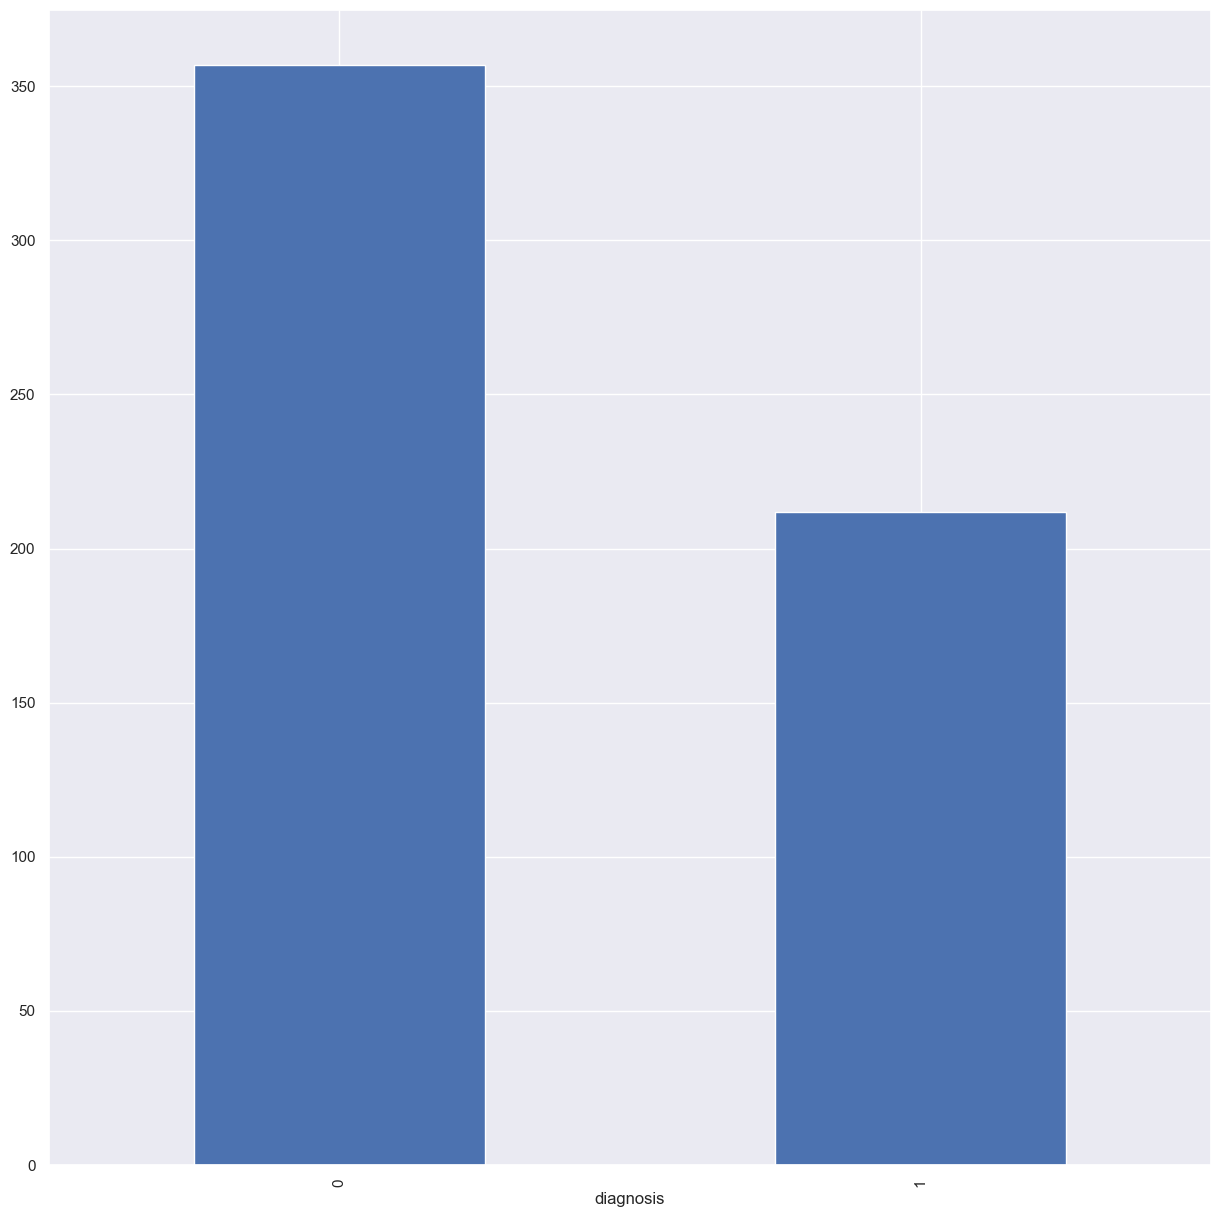

In [104]:
df["diagnosis"].value_counts().plot.bar();

In [105]:
def grab_col_names(df, cat_th=10, car_th=20):
    """

    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    ------
        df: df
                Değişken isimleri alınmak istenilen df
        cat_th: int, optional
                numerik fakat kategorik olan değişkenler için sınıf eşik değeri
        car_th: int, optinal
                kategorik fakat kardinal değişkenler için sınıf eşik değeri

    Returns
    ------
        cat_cols: list
                Kategorik değişken listesi
        num_cols: list
                Numerik değişken listesi
        cat_but_car: list
                Kategorik görünümlü kardinal değişken listesi

    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))


    Notes
    ------
        cat_cols + num_cols + cat_but_car = toplam değişken sayısı
        num_but_cat cat_cols'un içerisinde.
        Return olan 3 liste toplamı toplam değişken sayısına eşittir: cat_cols + num_cols + cat_but_car = değişken sayısı

    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in df.columns if df[col].dtypes == "O"]
    num_but_cat = [col for col in df.columns if df[col].nunique() < cat_th and
                   df[col].dtypes != "O"]
    cat_but_car = [col for col in df.columns if df[col].nunique() > car_th and
                   df[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in df.columns if df[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {df.shape[0]}")
    print(f"Variables: {df.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

In [106]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 569
Variables: 31
cat_cols: 1
num_cols: 30
cat_but_car: 0
num_but_cat: 1


In [107]:
def outlier_thresholds(dataframe, col_name, q1=0.25, q3=0.75):
    """
    Shows the lower and upper limits of the variable to be examined.

    Parameters
    ----------
        dataframe: dataframe
                    Data to be checked
        col_name: str
                    The name of the variable to be examined for outliers.
        q1: float, optional
                    The value of the first quartile. The default is 0.25.
        q3: float, optional
                    The value of the third quartile. The default is 0.75.

    Returns
    -------
        low_limit: float
                    The lower limit value of the variable.
        up_limit: float
                    The upper limit value of the variable.
        
    Examples
    -------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(outlier_thresholds(df, "sepal_length"))

    Notes   
    -------
        The lower and upper limits of the variable are calculated by the formula below.
        IQR = q3 - q1
        lower_limit = q1 - 1.5 * IQR
        upper_limit = q3 + 1.5 * IQR

    """
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def check_outlier(dataframe, col_name, q1=0.25, q3=0.75):
    """

    Checks whether there is an outlier in the variable to be examined.

    Parameters
    ----------
        dataframe: dataframe
                    Data to be checked
        col_name: str
                    The name of the variable to be examined for outliers.
        q1: float, optional
                    The value of the first quartile. The default is 0.25.
        q3: float, optional
                    The value of the third quartile. The default is 0.75.

    Returns
    -------
        True: bool
                    If there is an outlier, it returns True.
        False: bool
                    If there is no outlier, it returns False.

    Examples
    -------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(check_outlier(df, "sepal_length"))

    """
    low_limit, up_limit = outlier_thresholds(dataframe, col_name, q1, q3)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


def replace_with_thresholds(dataframe, variable, q1=0.25, q3=0.75):
    """

    Replaces outliers with lower and upper limits.

    Parameters
    ----------
        dataframe: dataframe
                    Data to be checked
        variable: str
                    The name of the variable to be examined for outliers.
        q1: float, optional
                    The value of the first quartile. The default is 0.25.
        q3: float, optional
                    The value of the third quartile. The default is 0.75.

    Returns
    -------
        None

    """
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1, q3)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [108]:
# #  Checking outlier varlues but first I will build the model and check the results without outlier control
# for col in num_cols:
#     print(col, check_outlier(df, col))
#     if check_outlier(df, col):
#         replace_with_thresholds(df, col)

In [109]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    """

    Shows the variables with a correlation value above the threshold.

    Parameters
    ----------
        dataframe: dataframe
                    Data to be checked
        plot: bool, optional
                    If True, it shows the correlation matrix. The default is False.
        corr_th: float, optional
                    Correlation threshold value. The default is 0.90.

    Returns
    -------
        drop_list: list
                    List of variables to be dropped.
        
                    
    Examples
    -------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(high_correlated_cols(df, plot=True))

    """
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        sns.heatmap(corr, cmap="RdBu", annot=True)
        plt.show(block=True)
    return drop_list

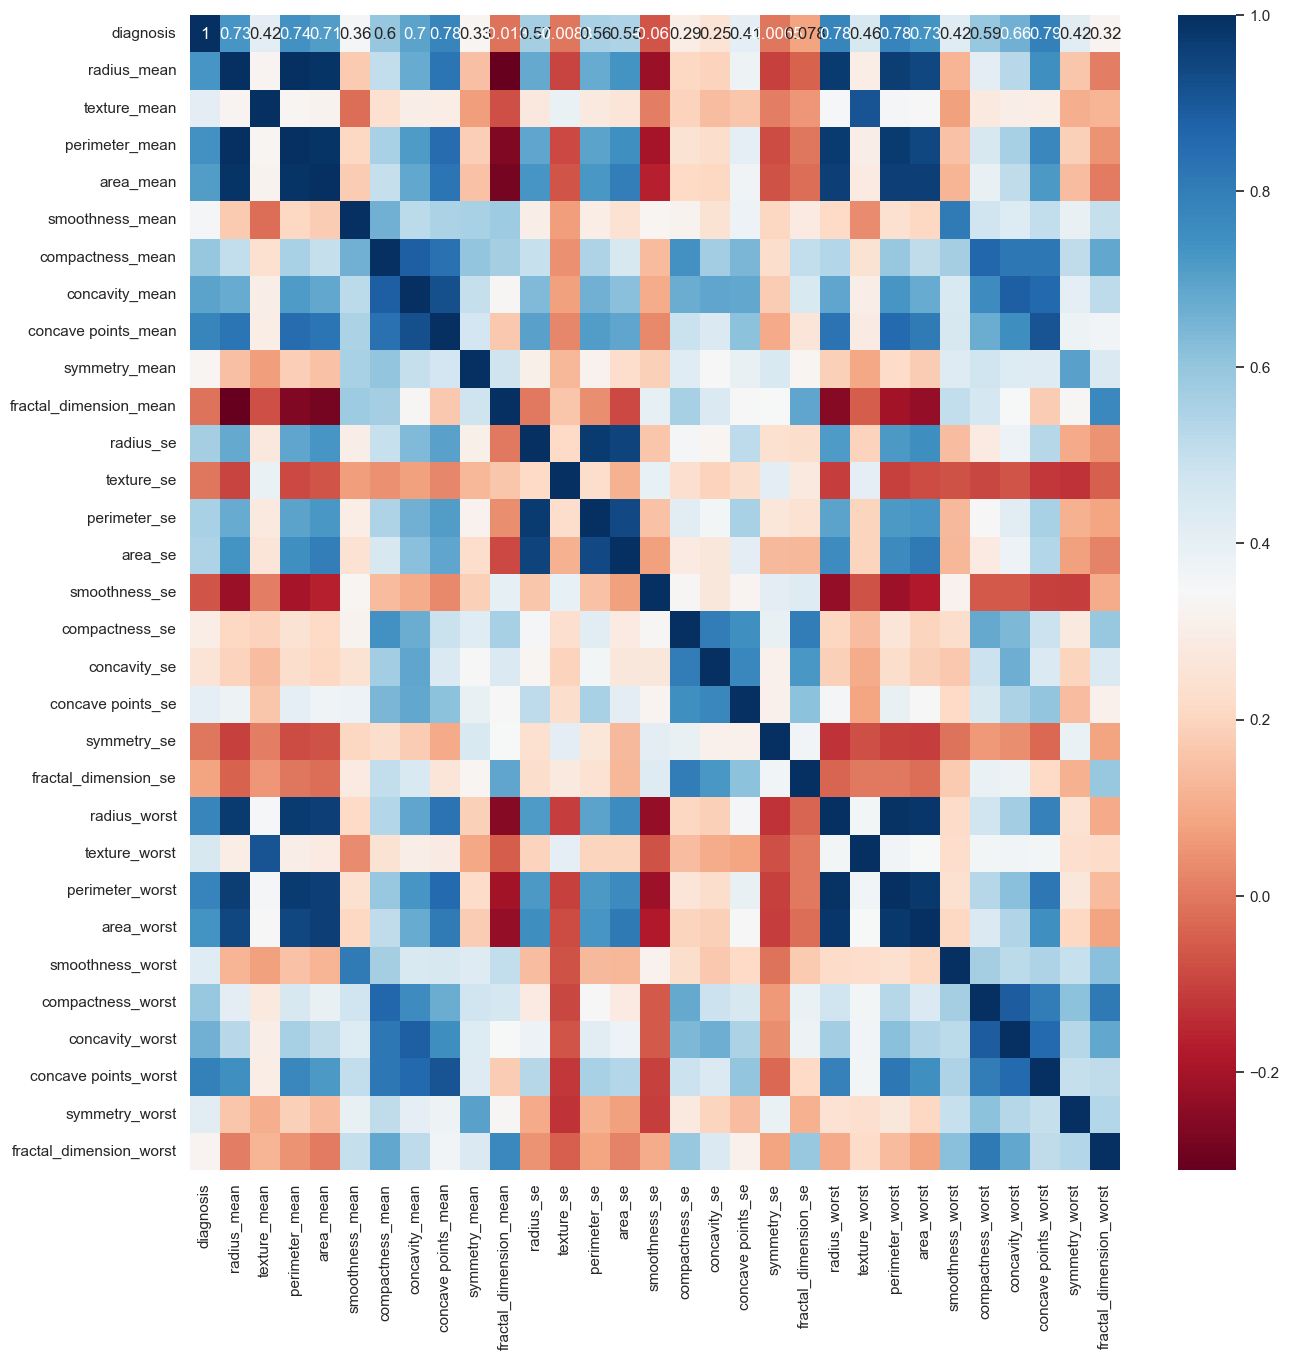

In [110]:
high_correlated_cols(df, plot=True);

In [111]:
# rs = RobustScaler()
# df[num_cols] = rs.fit_transform(df[num_cols])

In [112]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [113]:
y = df["diagnosis"]
X = df.drop(["diagnosis"], axis=1)

In [114]:
def zscore_normalization(X):
    """
    computes  X, zcore normalized by column

    Args:
      X (ndarray (m,n))     : input data, m examples, n features

    Returns:
      X_norm (ndarray (m,n)): input normalized by column
      mu (ndarray (n,))     : mean of each feature
      sigma (ndarray (n,))  : standard deviation of each feature
    """
    # number of samples and number of features
    m, n = X.shape
    # calculate the mean
    mu = X.mean(axis=0)
    # calculate the std
    sigma = np.zeros((n, ))
    for i in range(m):
      for j in range(n):
        sigma[j] += (X[i][j] - mu[j]) ** 2
    sigma /= m
    sigma = np.sqrt(sigma)
    X_norm = (X - mu) / sigma
    return (X_norm, mu, sigma)

In [115]:
X = X.values
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [116]:
X_norm, mu, sigma = zscore_normalization(X)

In [117]:
X_norm

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [118]:
def train_test_split(X, y, test_size=0.3):
    """
      Split the data to train and test
      Args:
        X (ndarray (m,n)) : Data, m examples and n features
        y (ndarray (m, )) : target values
        test_size (float) : size of the test data
        train_size (float): size of the training data
      Returns:
        X_train (ndarray(,n)): training data
        X_test  (ndarray(,n)): test data
        y_train (ndarray())  : training targets
        y_test  (ndarray())  : test targets
    """
    # number of features
    m, n = X.shape
    # train size
    tsize = int(test_size * X.shape[0]) - 1
    # declare returned variables
    X_train, X_test, y_train, y_test = [], [], [], []
    # create random indices
    indices = np.random.randint(low=0, high=X.shape[0], size=tsize)
    # loop through all samples and select the train and test sets
    for i in range(m):
        if i in indices:
          X_test.append(X[i])
          y_test.append(y[i])
        else:
          X_train.append(X[i])
          y_train.append(y[i])
    # transform into np arrayes
    X_train, X_test, y_train, y_test = np.array(X_train), np.array(X_test), np.array(y_train), np.array(y_test)
    return X_train, X_test, y_train, y_test

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y)

print("X_train = \n", X_train[:5], ",  X_train.shape =", X_train.shape, "X 2-D array\n")
print("X_test = \n", X_test[:5], ",  X_test.shape =", X_test.shape, "X 2-D array\n")
print("y_train = \n", y_train[:5], ",  y_train.shape =", y_train.shape, "y 1-D array\n")
print("y_test = \n", y_test[:5], ",  y_test.shape =", y_test.shape, "y 1-D array\n")

X_train = 
 [[ 1.09706398e+00 -2.07333501e+00  1.26993369e+00  9.84374905e-01
   1.56846633e+00  3.28351467e+00  2.65287398e+00  2.53247522e+00
   2.21751501e+00  2.25574689e+00  2.48973393e+00 -5.65265059e-01
   2.83303087e+00  2.48757756e+00 -2.14001647e-01  1.31686157e+00
   7.24026158e-01  6.60819941e-01  1.14875667e+00  9.07083081e-01
   1.88668963e+00 -1.35929347e+00  2.30360062e+00  2.00123749e+00
   1.30768627e+00  2.61666502e+00  2.10952635e+00  2.29607613e+00
   2.75062224e+00  1.93701461e+00]
 [ 1.82982061e+00 -3.53632408e-01  1.68595471e+00  1.90870825e+00
  -8.26962447e-01 -4.87071673e-01 -2.38458552e-02  5.48144156e-01
   1.39236330e-03 -8.68652457e-01  4.99254601e-01 -8.76243603e-01
   2.63326966e-01  7.42401948e-01 -6.05350847e-01 -6.92926270e-01
  -4.40780058e-01  2.60162067e-01 -8.05450380e-01 -9.94437403e-02
   1.80592744e+00 -3.69203222e-01  1.53512599e+00  1.89048899e+00
  -3.75611957e-01 -4.30444219e-01 -1.46748968e-01  1.08708430e+00
  -2.43889668e-01  2.81189987

In [120]:
def sigmoid(z):
    """
    Compute the sigmoid of z

    Args:
        z (ndarray): A scalar, numpy array of any size.

    Returns:
        g (ndarray): sigmoid(z), with the same shape as z
    """
    # apply the sigmoid function
    g = 1 / (1 + np.exp(-z))
    return g

In [121]:
# prediction function implemntation
def predict(X, w, b):
    """
    single predict using linear regression
    Args:
      X (ndarray): Shape (m, n) example with multiple features
      w (ndarray): Shape (n,) model parameters
      b (scalar):             model parameter

    Returns:
      p (scalar):  prediction
    """
    # apply sigmiod and threshold
    p = sigmoid(np.dot(w, X) + b)
    return p

In [122]:
# predicts the exact value for the class
def predict_class(X, w, b):
    """
    single predict using linear regression
    Args:
      X (ndarray): Shape (m, n) example with multiple features
      w (ndarray): Shape (n,) model parameters
      b (scalar):             model parameter

    Returns:
      p (scalar):  prediction
    """
    # apply sigmiod and threshold
    p = 1. if sigmoid(np.dot(X, w) + b) >= 0.5 else 0.
    return p

In [123]:
# accuracy function implementation
def get_accuracy(X, y, w, b):
    """
    Returns the accuracy of the model
    Args:
    X (ndarray): Shape(m, n) examples with multiple features
    y (ndarray): Shape (m,) the actual target values
    w (ndarray): Shape (n,) model parameters
    b (scalar) : model parameter

    Returns:
      accuracy (scalar): the accuracy of the model
    """
    m = X.shape[0]
    correct = 0
    # count the correct predictions
    for i in range(m):
      prediction = predict_class(X[i], w, b)
      if prediction == y[i]:
        correct += 1
    # proportion of correct predictions among all predictions
    accuracy = round(correct / m, 2)
    return accuracy

In [124]:
# cost function for logistic regression
def compute_cost(X, y, w, b):
    """
    Computes the cost function for logistic regression.

    Args:
      X (ndarray (m,n)): Data, m examples and n features
      y (ndarray (m,)): target values
      w (ndarray (m,)): model parameters
      b (scalar)    : model parameter

    Returns:
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # examples and features
    m, n = X.shape
    total_cost = 0.

    # compute the loss for each example
    for i in range(m):
      epsilon = 1e-9 # to avoid overflow
      f_wb_i = predict(X[i], w, b) + epsilon
      total_cost += (y[i] * np.log(f_wb_i) + (1 - y[i]) * np.log(1 - f_wb_i))

    total_cost /= -m

    return total_cost

In [125]:
# function to compute the gradients
def compute_gradient(X, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      X (ndarray (m,n)): Data, m examples with n features
      y (ndarray (m,)) : target values
      w (ndarray (n,)) : model parameters
      b (scalar)       : model parameter

    Returns:
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w.
      dj_db (scalar):       The gradient of the cost w.r.t. the parameter b.
    """
    # number of examples
    m, n = X.shape

    # initial gradients
    dj_dw = np.zeros((n, ))
    dj_db = 0.

    # compute the actual gradient for each parameter
    for i in range(m):
      f_wb_i = predict(X[i], w, b)
      err = f_wb_i - y[i]
      dj_dw += err * X[i]
      dj_db += err

    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

In [126]:
# apply gradient descent algorithm
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    """
    Performs batch gradient descent to learn w and b. Updates w and b by taking
    num_iters gradient steps with learning rate alpha

    Args:
      X (ndarray (m,n))   : Data, m examples with n features
      y (ndarray (m,))    : target values
      w_in (ndarray (n,)) : initial model parameters
      b_in (scalar)       : initial model parameter
      cost_function       : function to compute cost
      gradient_function   : function to compute the gradient
      alpha (float)       : Learning rate
      num_iters (int)     : number of iterations to run gradient descent

    Returns:
      w (ndarray (n,)) : Updated values of parameters
      b (scalar)       : Updated value of parameter
    """
    # initialize some variables
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    # apply the algorithm `num_iters` of iterations
    for i in range(num_iters):
      # compute gradient
      dj_dw, dj_db = gradient_function(X, y , w, b)
      # simultneous update
      w = w - alpha * dj_dw
      b = b - alpha * dj_db

      # save the history
      if i < 100000:
        J_history.append(cost_function(X, y, w, b))

      # Print cost every at intervals 10 times or as many iterations if < 10
      if i % math.ceil(num_iters / 10) == 0:
        print("{:>8} {:>11.5e}".format(i, cost_function(X, y, w, b)))

    return w, b, J_history

In [127]:
# initialize parameters
n = X_train.shape[1]
# initial_w = np.random.randint(low=-40, high=40, size=n)
initial_w = np.zeros((n,))
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 1.0e-3
# run gradient descent
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                            compute_cost, compute_gradient, alpha,
                                            iterations)

print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = X_train.shape
for i in range(5):
    print(f"prediction: {predict_class(X[i], w_final, b_final)}, target value: {y_train[i]}")

       0 6.91278e-01
     100 5.48741e-01
     200 4.63000e-01
     300 4.06311e-01
     400 3.65869e-01
     500 3.35368e-01
     600 3.11395e-01
     700 2.91953e-01
     800 2.75798e-01
     900 2.62108e-01
b,w found by gradient descent: -0.12,[ 0.15290767  0.09982995  0.15382604  0.14758447  0.06650498  0.10099654
  0.1291621   0.1602311   0.05150908 -0.02989344  0.10719981 -0.00382347
  0.10211862  0.10568617 -0.02280514  0.02403332  0.00734745  0.05546066
 -0.0138365  -0.02510052  0.16755599  0.11956115  0.16672661  0.15602087
  0.10098721  0.11826916  0.12970477  0.17198513  0.09616336  0.05933942] 
prediction: 1.0, target value: 1
prediction: 1.0, target value: 1
prediction: 1.0, target value: 1
prediction: 1.0, target value: 1
prediction: 1.0, target value: 1


In [128]:
# Assuming you have the predictions for X_test using your model
print("The cost of our model is {}".format(compute_cost(X_train, y_train, w_final, b_final)))
print("The accuracy of our model is {}%".format(get_accuracy(X_test, y_test, w_final, b_final) * 100))

The cost of our model is 0.25043405066787783
The accuracy of our model is 96.0%
